# Clustering TCR Sequences

Following featurization of the TCRSeq data, users will often want to cluster the TCRSeq data to identify possible antigen-specific clusters of sequences. In order to do this, we have provided multiple ways for clustering your TCR sequences.

## Phenograph Clustering

The first method we will explore is using a network-graph based clustering algorithm called Phenograph (https://github.com/jacoblevine/PhenoGraph). This method automatically determines the number of clusters in the data by maximizing the modularity of the network-graph asssembled from the data. Of note, this algorithm is very fast and will be useful for when there are possibly thousands to tens of thouands of sequences to cluster. However, clusters by this method tend to be quite large.

First, we will load data and train the VAE.

In [1]:
%%capture
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU = DeepTCR_U('Tutorial')

#Load Data from directories
DTCRU.Get_Data(directory='../../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

#Train VAE
DTCRU.Train_VAE(Load_Prev_Data=False)


We will then run the clustering command.

In [2]:
DTCRU.Cluster(clustering_method='phenograph')

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.322746992111206 seconds
Jaccard graph constructed in 0.8609929084777832 seconds
Wrote graph to binary file in 0.2611570358276367 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.88163
After 2 runs, maximum modularity is Q = 0.883347
Louvain completed 22 runs in 3.532525062561035 seconds
PhenoGraph complete in 7.001564025878906 seconds
Clustering Done


Following clustering, we can view the clustering solutions by looking at the object variable called Cluster_DFs.

In [3]:
DFs = DTCRU.Cluster_DFs
print(DFs[0])

    Alpha_Sequences     Beta_Sequences   Labels              Sample  \
0              None     CASSIGQYNSPLYF    Db-F2           Db-F2.tsv   
1              None    CASSPGTGGTERLFF    Db-F2           Db-F2.tsv   
2              None      CASSPGASSDYTF    Db-F2           Db-F2.tsv   
3              None      CASSPGANSDYTF    Db-F2           Db-F2.tsv   
4              None    CASSRDISYNSPLYF    Db-F2           Db-F2.tsv   
5              None     CASSQGQIGSDYTF    Db-F2           Db-F2.tsv   
6              None      CASSQGAYSDYTF    Db-F2           Db-F2.tsv   
7              None    CASSPDSSYNSPLYF    Db-F2           Db-F2.tsv   
8              None     CASSDFISNERLFF    Db-F2           Db-F2.tsv   
9              None    CASRPDISYNSPLYF    Db-F2           Db-F2.tsv   
10             None      CASGTGENSDYTF    Db-F2           Db-F2.tsv   
11             None      CASSMGANERLFF    Db-F2           Db-F2.tsv   
12             None  CAWSPLTGGESGNTLYF   Db-M45          Db-M45.tsv   
13    

We can also choose to save these results to a directory called Name of object + '_Results' by setting the write_to_sheets parameter to True. There, we can find the propritons of every sample in each cluster and csv files for every cluster detailing the sequence information with other information as well.

In [4]:
DTCRU.Cluster(clustering_method='phenograph',write_to_sheets=True)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.3625476360321045 seconds
Jaccard graph constructed in 0.8622629642486572 seconds
Wrote graph to binary file in 0.2122325897216797 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.881628
After 2 runs, maximum modularity is Q = 0.882635
After 18 runs, maximum modularity is Q = 0.884541
Louvain completed 38 runs in 5.93026876449585 seconds
PhenoGraph complete in 9.385041236877441 seconds
Clustering Done


We can also employ two other clustering algorithms (hierarchical clustering and DBSCAN). For these types of methods, we can either control the settings for the algorithm such as the threshold parameter (t), the criterion/linkage algorithm for heirarchical clustering, or we can allow the method to determine the optimal threshold parameter by maximizing the silhoutte score of the clustering solution. First, if we run hierarchial clustering letting the program determing the right threshold parameters:

## Hierarchical Clustering

In [5]:
DTCRU.Cluster(clustering_method='hierarchical')

Clustering Done


Or we can set the parameters ourselves.

In [6]:
DTCRU.Cluster(clustering_method='hierarchical',criterion='distance',t=1.0)

Clustering Done


## DBSCAN clustering

And to use DBSCAN...

In [7]:
DTCRU.Cluster(clustering_method='dbscan')

Clustering Done


In the case there are perhaps too many sequences to efficiently cluster the data quickly, one can downsample the data and then use a k-nearest neighbor algorithm to classify the rest of the sequences like so .Here, we will downsample 500 sequenes for clustering and then assign the rest via KNN.

In [8]:
DTCRU.Cluster(clustering_method='phenograph',sample=100)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.009317874908447266 seconds
Jaccard graph constructed in 0.04854011535644531 seconds
Wrote graph to binary file in 0.006888866424560547 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.381735
Louvain completed 21 runs in 2.197479009628296 seconds
PhenoGraph complete in 2.2696707248687744 seconds
Clustering Done


Finally, we can visualize the clustering results through a UMAP representation of the sequences.

## Clustering Visualization

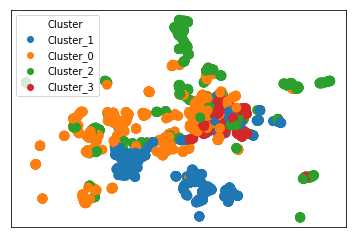

In [9]:
DTCRU.UMAP_Plot(by_cluster=True)